In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.core.display import HTML
from sklearn.impute import SimpleImputer
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
plt.rc("font", size=14)
plt.rc("text", usetex=True)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from re import search
%matplotlib inline

In [2]:
loan_data = pd.read_csv('loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
loan_data.isna().sum()

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64

In [16]:
notallmissing = np.array(loan_data.isna().sum().index.tolist())[loan_data.isna().sum().values != 2260668]

In [17]:
loan_data = loan_data.loc[:, notallmissing]

In [29]:
loan_data.isna().sum().sort_values(ascending=False)[:50]

orig_projected_additional_accrued_interest    2252242
hardship_reason                               2250055
deferral_term                                 2250055
hardship_amount                               2250055
hardship_start_date                           2250055
hardship_end_date                             2250055
payment_plan_start_date                       2250055
hardship_length                               2250055
hardship_dpd                                  2250055
hardship_loan_status                          2250055
hardship_status                               2250055
hardship_payoff_balance_amount                2250055
hardship_last_payment_amount                  2250055
hardship_type                                 2250055
settlement_percentage                         2227612
debt_settlement_flag_date                     2227612
settlement_status                             2227612
settlement_date                               2227612
settlement_amount           

In [63]:
checkdatesindex = loan_data[loan_data.loan_status=='Charged Off'].loan_status.dropna().index

In [58]:
pd.to_datetime(loan_data.loc[checkdatesindex, :].issue_d).dt.year.value_counts()

Series([], Name: issue_d, dtype: int64)

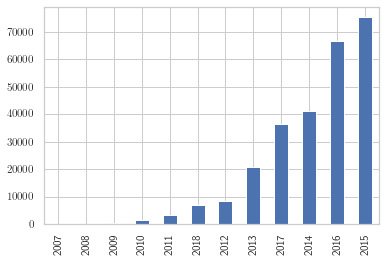

In [65]:
pd.to_datetime(loan_data.loc[checkdatesindex, :].issue_d).dt.year.value_counts().sort_values().plot.bar()#.mean()
_ = plt.show()